# Create monthly CESM atmospheric deposition files

NCAR CESM output:
Community Earth System Model (Community Atmosphere Model - CAM https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2013MS000279) output: https://www.earthsystemgrid.org/; CESM2 Large Ensemble Atmosphere Post Processed Data, Monthly Averages.

Specific run output: https://www.earthsystemgrid.org/dataset/ucar.cgd.cesm2le.output.html

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import datetime as dt
import cmocean
import pickle
import matplotlib
import modules.mapping_functions as mf
import xarray as xr
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

For Mode MAM3 (https://www.geosci-model-dev.net/5/709/2012/):

- a1 --- Aitken mode --- 0.015-0.053 μm
- a2 --- Accumulation mode --- 0.058-0.27 μm
- a3 --- Coarse mode --- 0.80-3.65 μm

#### Parameters

In [2]:
data_folder = '/data/brogalla/NCAR-CESM2/'

# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

#### Load files

In [3]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask = np.array(mesh.variables['tmask'])
tmask = np.array(tmask[0,:,:,:])
ANHA12_lons = np.array(mesh.variables['nav_lon'])
ANHA12_lats = np.array(mesh.variables['nav_lat'])
Z_masked = np.ma.masked_where((tmask > 0.1), tmask) 

In [5]:
# ---- Load data: ------------
# Black carbon:
BC0 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_BLACK_CARBON_FLUX_CPL.199001-199912.nc')
BC1 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_BLACK_CARBON_FLUX_CPL.200001-200912.nc')
BC2 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_BLACK_CARBON_FLUX_CPL.201001-201412.nc')
BC3 = xr.open_dataset(f'{data_folder}b.e21.BSSP370cmip6.f09_g17.LE2-1001.001.pop.h.ATM_BLACK_CARBON_FLUX_CPL.201501-202412.nc')
ATM_BC0  = BC0['ATM_BLACK_CARBON_FLUX_CPL'].values
ATM_BC1  = BC1['ATM_BLACK_CARBON_FLUX_CPL'].values # time, lat, lon; g/cm2/s
ATM_BC2  = BC2['ATM_BLACK_CARBON_FLUX_CPL'].values
ATM_BC3  = BC3['ATM_BLACK_CARBON_FLUX_CPL'].values
BC0_time = BC0.indexes['time'].to_datetimeindex() 
BC1_time = BC1.indexes['time'].to_datetimeindex() 
BC2_time = BC2.indexes['time'].to_datetimeindex() 
BC3_time = BC3.indexes['time'].to_datetimeindex() 
# combine:
# ATM_BC   = np.vstack([ATM_BC0, ATM_BC1, ATM_BC2, ATM_BC3])
# BC_time  = np.hstack([BC0_time, BC1_time, BC2_time, BC3_time])
# BC_date  = np.array([pd.Timestamp(time).to_pydatetime() for time in BC_time])
# combine:
ATM_BC   = np.vstack([ATM_BC1, ATM_BC2, ATM_BC3])
BC_time  = np.hstack([BC1_time, BC2_time, BC3_time])
BC_date  = np.array([pd.Timestamp(time).to_pydatetime() for time in BC_time])
  
# Fine dust:
FD1 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_FINE_DUST_FLUX_CPL.200001-200912.nc')
FD2 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_FINE_DUST_FLUX_CPL.201001-201412.nc')
FD3 = xr.open_dataset(f'{data_folder}b.e21.BSSP370cmip6.f09_g17.LE2-1001.001.pop.h.ATM_FINE_DUST_FLUX_CPL.201501-202412.nc')
ATM_FD1  = FD1['ATM_FINE_DUST_FLUX_CPL'].values # time, lat, lon; g/cm2/s
ATM_FD2  = FD2['ATM_FINE_DUST_FLUX_CPL'].values
ATM_FD3  = FD3['ATM_FINE_DUST_FLUX_CPL'].values
FD1_time = FD1.indexes['time'].to_datetimeindex() 
FD2_time = FD2.indexes['time'].to_datetimeindex() 
FD3_time = FD3.indexes['time'].to_datetimeindex()
# combine:
ATM_FD   = np.vstack([ATM_FD1, ATM_FD2, ATM_FD3])
FD_time  = np.hstack([FD1_time, FD2_time, FD3_time])
FD_date  = np.array([pd.Timestamp(time).to_pydatetime() for time in FD_time])
    
# Coarse dust: 
CD1 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_COARSE_DUST_FLUX_CPL.200001-200912.nc')
CD2 = xr.open_dataset(f'{data_folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.ATM_COARSE_DUST_FLUX_CPL.201001-201412.nc')
CD3 = xr.open_dataset(f'{data_folder}b.e21.BSSP370cmip6.f09_g17.LE2-1001.001.pop.h.ATM_COARSE_DUST_FLUX_CPL.201501-202412.nc')
ATM_CD1  = CD1['ATM_COARSE_DUST_FLUX_CPL'].values # time, lat, lon; g/cm2/s
ATM_CD2  = CD2['ATM_COARSE_DUST_FLUX_CPL'].values
ATM_CD3  = CD3['ATM_COARSE_DUST_FLUX_CPL'].values
CD1_time = CD1.indexes['time'].to_datetimeindex() 
CD2_time = CD2.indexes['time'].to_datetimeindex() 
CD3_time = CD3.indexes['time'].to_datetimeindex()
# combine:
ATM_CD   = np.vstack([ATM_CD1, ATM_CD2, ATM_CD3])
CD_time  = np.hstack([CD1_time, CD2_time, CD3_time])
CD_date  = np.array([pd.Timestamp(time).to_pydatetime() for time in CD_time])
    
# Latitudes and longitudes of T grid points
CESM2_lons = BC1['TLONG'].values
CESM2_lons[CESM2_lons >=180] = -360 + CESM2_lons[CESM2_lons >=180] # degrees east
CESM2_lats = BC1['TLAT'].values

In [7]:
def save_file(filename, field1, field2, field3):
    ncd = nc.Dataset(filename, 'w', zlib=True)
    ncd.createDimension('x',len(mesh.dimensions['x']))
    ncd.createDimension('y',len(mesh.dimensions['y']))
    ncd.createDimension('time_counter',None)
    
    # convert units from g/cm2/s to kg/m2/s: (1 kg/ 1000 g) * (10,000 cm2 / m2)
    field1_convert = field1*10
    field2_convert = field2*10
    field3_convert = field3*10
    
    # variables
    fine_dust             = ncd.createVariable('fdust', 'float64', ('y','x'))
    fine_dust.units       = 'kg/m2/s'
    fine_dust.long_name   = 'Fine dust deposition flux'  
    fine_dust.coordinates = 'nav_lon nav_lat'
    fine_dust[:]          = field1_convert
    
    coarse_dust             = ncd.createVariable('cdust', 'float64', ('y','x'))
    coarse_dust.units       = 'kg/m2/s'
    coarse_dust.long_name   = 'Coarse dust deposition flux'  
    coarse_dust.coordinates = 'nav_lon nav_lat'
    coarse_dust[:]          = field2_convert
    
    black_c             = ncd.createVariable('bc', 'float64', ('y','x'))
    black_c.units       = 'kg/m2/s'
    black_c.long_name   = 'Black carbon deposition flux'  
    black_c.coordinates = 'nav_lon nav_lat'
    black_c[:]          = field3_convert
    
    print('saved ', filename)

    ncd.close()
    return

In [8]:
def find_dates(file_year):
    
    indices = np.array([])
    for d,date in enumerate(FD_date):
#     for d,date in enumerate(BC_date):
        if date.year==file_year:
            indices = np.append(indices, d)
            
    start_index = int(np.amin(indices))
    end_index   = int(np.amax(indices))
    
    print('start index: ', start_index)
    print('end index: ', end_index)
    
    return start_index, end_index

In [9]:
ATM_FDm = np.ma.masked_where(np.isnan(ATM_FD), ATM_FD)
ATM_CDm = np.ma.masked_where(np.isnan(ATM_CD), ATM_CD)
ATM_BCm = np.ma.masked_where(np.isnan(ATM_BC), ATM_BC)

In [22]:
def CESM_to_ANHA12(file_year, savefiles=False):
    
    si, ei = find_dates(file_year)
    
    # Select dates
    fine_dust    = ATM_FD[si:ei+1,:,:]
    coarse_dust  = ATM_CD[si:ei+1,:,:]
    black_carbon = ATM_BC[si:ei+1,:,:]
    
    print('Check that output is of the correct dimensions: ', fine_dust.shape, coarse_dust.shape, black_carbon.shape)
    
    interp_fine_dust    = np.empty((12, 2400, 1632))
    interp_coarse_dust  = np.empty((12, 2400, 1632))
    interp_black_carbon = np.empty((12, 2400, 1632))

    # loop over the months:
    for i in range(0,12):
        # Mask NaN values and remove
        fdm = np.ma.masked_where(np.isnan(fine_dust[i,:,:]), fine_dust[i,:,:])
        cdm = np.ma.masked_where(np.isnan(coarse_dust[i,:,:]), coarse_dust[i,:,:])
        bcm = np.ma.masked_where(np.isnan(black_carbon[i,:,:]), black_carbon[i,:,:])
        
        # Interpolate
        interp_fine_dust[i,:,:]    = mf.interp_np(CESM2_lons[~fdm.mask], CESM2_lats[~fdm.mask], \
                                                  fdm[~fdm.mask], ANHA12_lons, ANHA12_lats)
        interp_coarse_dust[i,:,:]  = mf.interp_np(CESM2_lons[~cdm.mask], CESM2_lats[~cdm.mask], \
                                                  cdm[~cdm.mask], ANHA12_lons, ANHA12_lats)
        interp_black_carbon[i,:,:] = mf.interp_np(CESM2_lons[~bcm.mask], CESM2_lats[~bcm.mask], \
                                                  bcm[~bcm.mask], ANHA12_lons, ANHA12_lats)
        
    if savefiles:
        location = '/ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/'
        
        for ind in range(1,13):
            save_file(f'{location}atm_flux_y{file_year}m{ind:02}.nc',interp_fine_dust[ind-1,:,:],\
                      interp_coarse_dust[ind-1,:,:], interp_black_carbon[ind-1,:,:])
    
    return interp_fine_dust, interp_coarse_dust, interp_black_carbon

#### Interpolate to ANHA12 grid:

In [23]:
for year in np.arange(2002,2022,1):
    print(year)
    interp_fine_dust, interp_coarse_dust, interp_black_carbon = CESM_to_ANHA12(year, savefiles=True)

2002
start index:  23
end index:  34
Check that output is of the correct dimensions:  (12, 384, 320) (12, 384, 320) (12, 384, 320)
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m01.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m02.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m03.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m04.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m05.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m06.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m07.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m08.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/atm_flux_y2002m09.nc
saved  /ocean/brogalla/GEOTRACES/data/Pb-forcing-202311/atmospheric/

## Look at long term trend

In [111]:
black_carbon = np.ma.zeros((len(range(1990,2020)),12,ATM_BC.shape[1],ATM_BC.shape[2]))

for y, year in enumerate(range(1990,2020)):
    si, ei = find_dates(year)
#     black_carbon[y,:,:,:] = ATM_BC[si:ei+1,:,:]
    for s, ind in enumerate(range(si,ei+1)):
        black_carbon[y,s,:,:] = np.ma.masked_where((CESM2_lats<60) | (CESM2_lons > -50), ATM_BC[ind,:,:])

start index:  0
end index:  10
start index:  11
end index:  22
start index:  23
end index:  34
start index:  35
end index:  46
start index:  47
end index:  58
start index:  59
end index:  70
start index:  71
end index:  82
start index:  83
end index:  94
start index:  95
end index:  106
start index:  107
end index:  118
start index:  119
end index:  130
start index:  131
end index:  142
start index:  143
end index:  154
start index:  155
end index:  166
start index:  167
end index:  178
start index:  179
end index:  190
start index:  191
end index:  202
start index:  203
end index:  214
start index:  215
end index:  226
start index:  227
end index:  238
start index:  239
end index:  250
start index:  251
end index:  262
start index:  263
end index:  274
start index:  275
end index:  286
start index:  287
end index:  298
start index:  299
end index:  310
start index:  311
end index:  322
start index:  323
end index:  334
start index:  335
end index:  346
start index:  347
end index:  35

(1990.0, 2020.0)

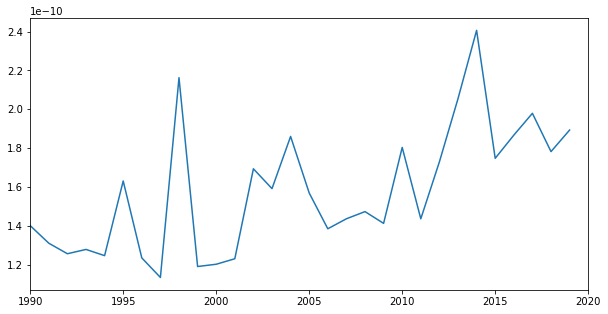

In [112]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
# ax.plot(np.nansum(black_carbon, axis=(2,3)).flatten())
ax.plot(np.arange(1990,2020), np.nansum(black_carbon, axis=(1,2,3)))
ax.set_xlim(1990,2020)

# Visualize forcing field

In [9]:
def plot_forcing_field(variable, vrange=(0,10)):
    
    fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj(ANHA12_lons[imin:imax,jmin:jmax], ANHA12_lats[imin:imax,jmin:jmax])
    
    var_plot = variable[imin:imax,jmin:jmax]

    proj.pcolormesh(x, y, var_plot, vmin=vrange[0], vmax=vrange[1], cmap=cmocean.cm.deep_r, zorder=2)
    
    return

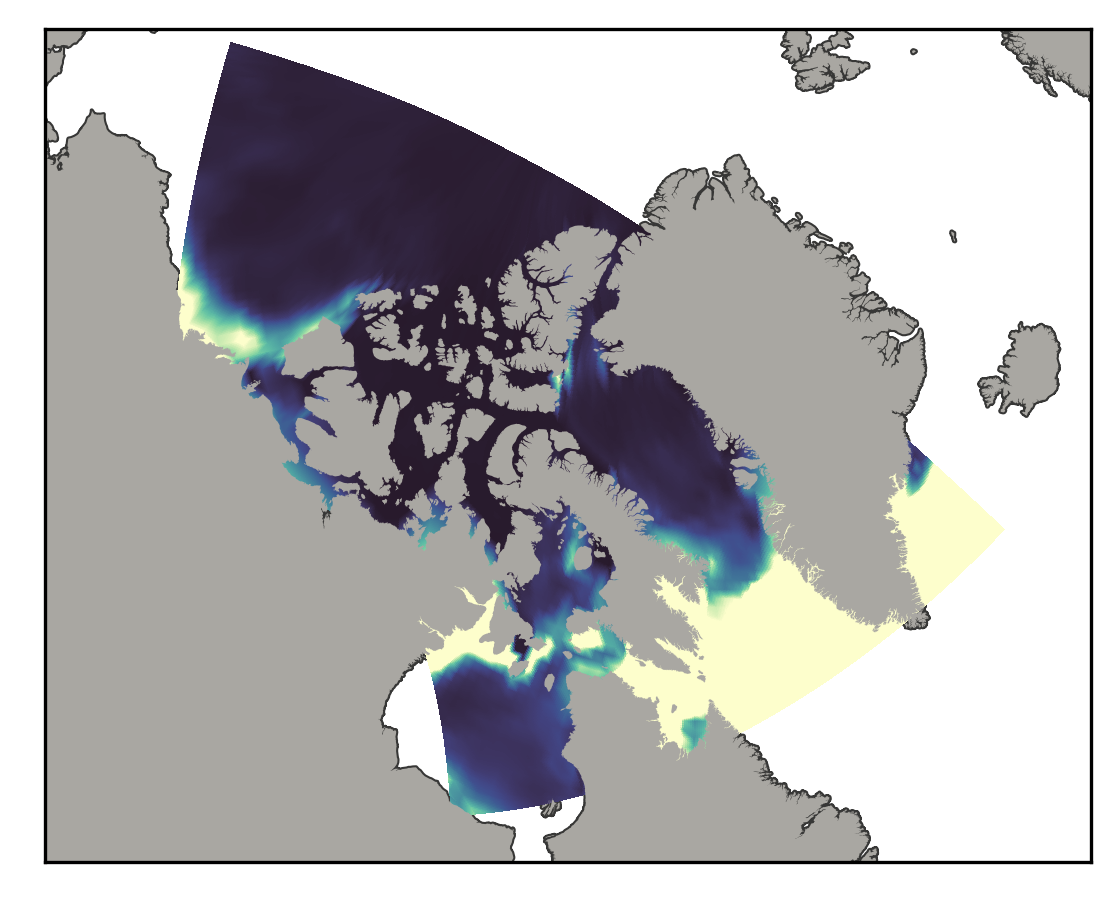

In [64]:
plot_forcing_field(interp_fine_dust[5,:,:], vrange=(0,1e-14))

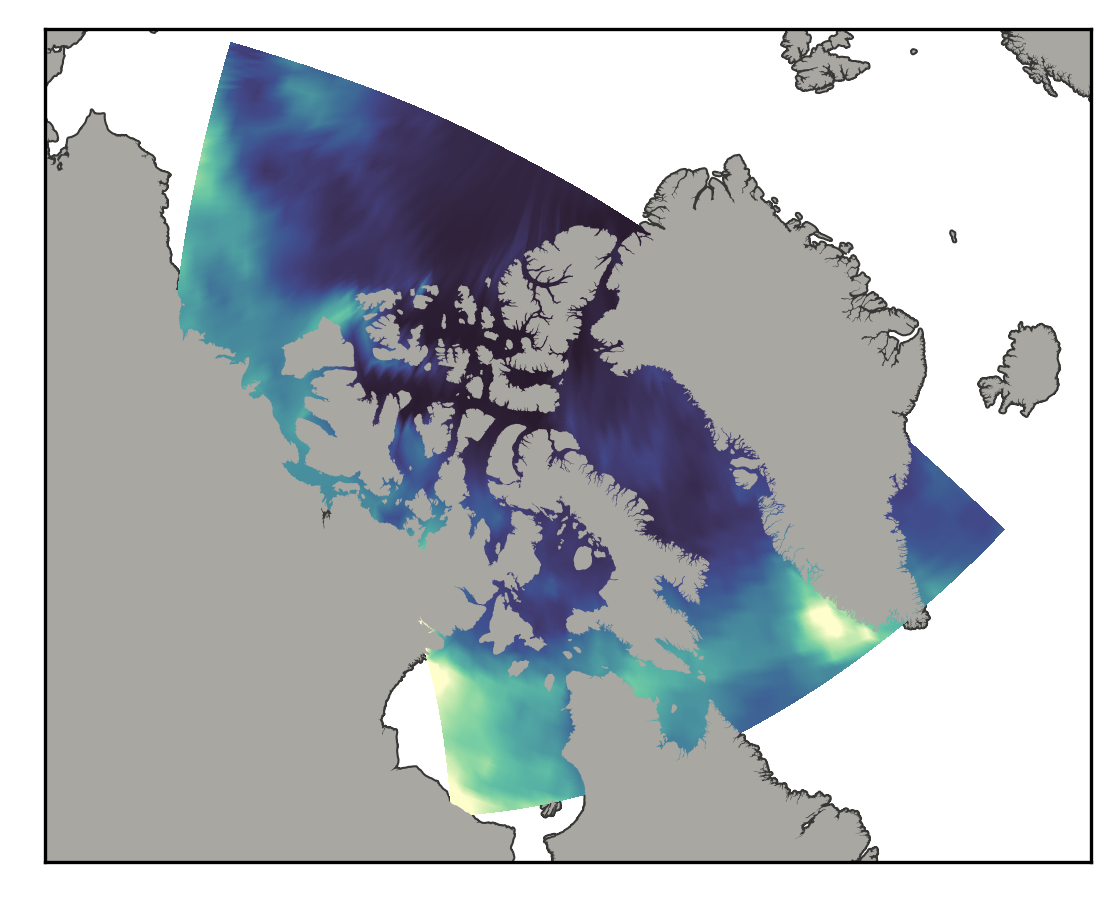

In [65]:
plot_forcing_field(interp_coarse_dust[8,:,:], vrange=(0,1e-12))

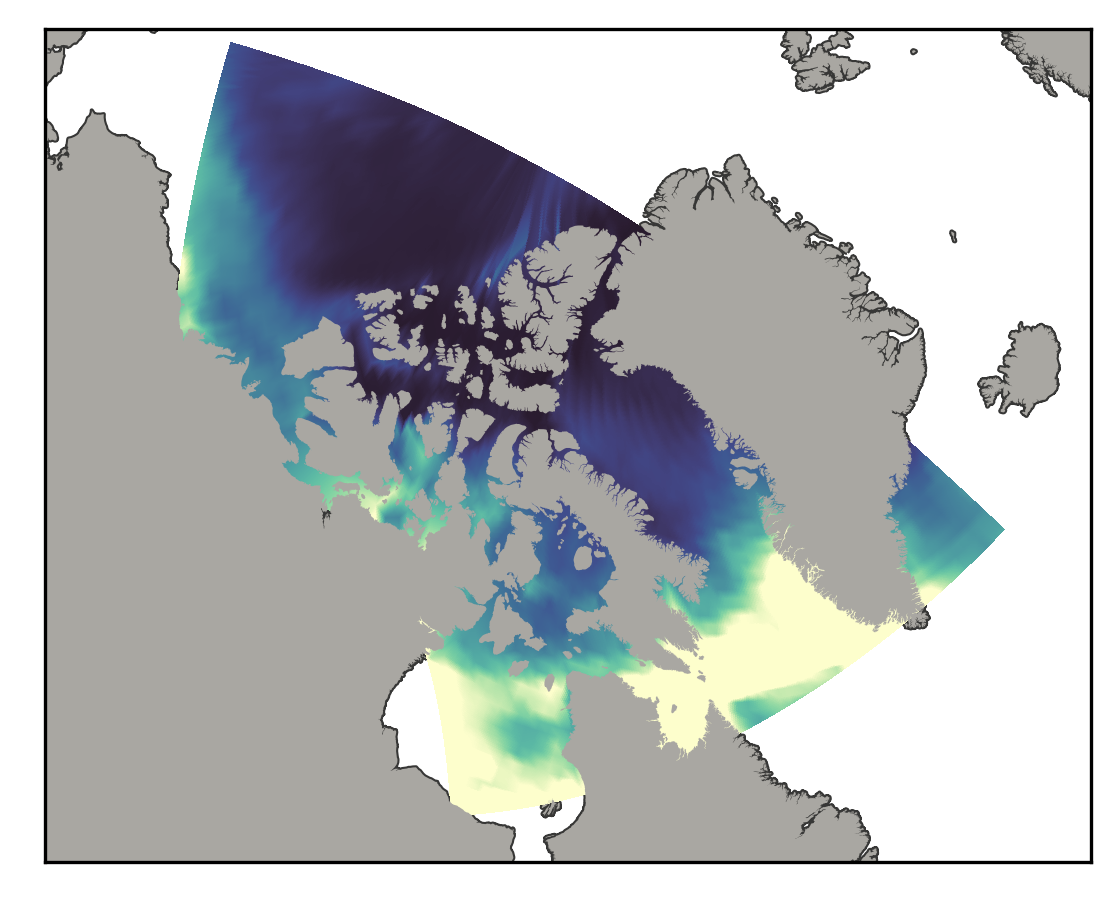

In [66]:
plot_forcing_field(interp_black_carbon[8,:,:], vrange=(0,3e-14))